In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

In [2]:
class_size = 6

In [76]:
def metrics(pro_total, pred_pro_total, test=True):
    # TN FP
    # FN TP
    multi_conf = multilabel_confusion_matrix(pro_total.T, pred_pro_total.T)
    a = [((multi_conf[i][0, 0] + multi_conf[i][1, 1])/multi_conf[i].sum()) for i in range(class_size)] # (TP+TN)/(TP+FP+FN+TN)
    p = [((multi_conf[i][1, 1])/(multi_conf[i][0, 1] + multi_conf[i][1, 1])) for i in range(class_size)] # TP/(TP+FP)
    r = [((multi_conf[i][1, 1])/(multi_conf[i][1, 0] + multi_conf[i][1, 1])) for i in range(class_size)] # TP/(TP+FN)
    f = [2*((i*j)/(i+j)) for i, j in zip(p, r)] # 2*(Recall*Precision)/(Recall+Precision)
    acc = np.mean(a)
    mac_p = precision_score(pro_total.T, pred_pro_total.T, average='macro')
    mac_r = recall_score(pro_total.T, pred_pro_total.T, average='macro')
    mac_f = f1_score(pro_total.T, pred_pro_total.T, average='macro')
    if test:
        print(pd.DataFrame({'EC1': [round(a[0], 3), round(p[0], 3), round(r[0], 3), round(f[0], 3)], 
                            'EC2': [round(a[1], 3), round(p[1], 3), round(r[1], 3), round(f[1], 3)], 
                            'EC3': [round(a[2], 3), round(p[2], 3), round(r[2], 3), round(f[2], 3)], 
                            'EC4': [round(a[3], 3), round(p[3], 3), round(r[3], 3), round(f[3], 3)], 
                            'EC5': [round(a[4], 3), round(p[4], 3), round(r[4], 3), round(f[4], 3)], 
                            'EC6': [round(a[5], 3), round(p[5], 3), round(r[5], 3), round(f[5], 3)]}, 
                           index=['Acc', 'Pre', 'Rec', 'F1s']))
        print('- accuracy : %.4f' % acc)
        print('- macro_precision : %.4f' % mac_p)
        print('- macro_recall : %.4f' % mac_r)
        print('- macro_f1 : %.4f' % mac_f)
    
    if test:
        plt.figure(figsize = (8, 1), dpi=300)
        for i in range(len(multi_conf)):
            plt.subplot(1, class_size, i+1)   
            sn.heatmap(multi_conf[i], annot=True, cmap='Blues', cbar=False, fmt="d", annot_kws={"size": 8})
            plt.tick_params(left=False, bottom=False)
            plt.xticks(fontsize=0)
            plt.yticks(fontsize=0)
    #         plt.xlabel('Pred')
    #         plt.ylabel('True')
        plt.tick_params(left=False, bottom=False)
        plt.tight_layout()
        plt.show()
    return a, p, r, f, acc, mac_p, mac_r, mac_f

def make_plots(df, pro_true, pro_pred):

    train_loss = df['list_train_loss'].iloc[0]
    train_acc = df['list_train_acc'].iloc[0]
    test_loss = df['list_test_loss'].iloc[0]
    test_acc = df['list_test_acc'].iloc[0]
    list_test_macp = df['list_test_macp'].iloc[0]
    list_test_macr = df['list_test_macr'].iloc[0]
    list_test_macf = df['list_test_macf'].iloc[0]
    a = df['accuracy'].iloc[0]
    p = df['precision'].iloc[0]
    r = df['recall'].iloc[0]
    f = df['f1score'].iloc[0]
    accuracy = df['test_acc'].iloc[0]
    macro_precision = df['macro_precision'].iloc[0]
    macro_recall = df['macro_recall'].iloc[0]
    macro_f1score = df['macro_f1score'].iloc[0]
    multi_conf = df['multi_conf'].iloc[0]

#     plt.rcParams["figure.figsize"] = (6, 6)
#     plt.plot([e for e in range(len(train_loss))], [float(t) for t in train_loss], label="train_loss", c='blue')
#     plt.plot([e for e in range(len(test_loss))], [float(t) for t in test_loss], label="test_loss", c='red')
#     plt.xlabel("Epoch")
#     plt.ylabel("Loss")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.savefig(f'{str(args.output_name)}_loss.png')

    plt.rcParams["figure.figsize"] = (6, 6)
    plt.plot([e for e in range(len(train_acc))], [float(t)*0.01 for t in train_acc], label="train_acc", c='blue')
    plt.plot([e for e in range(len(test_acc))], [float(t)*0.01 for t in test_acc], label="test_acc", c='red')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    plt.rcParams["figure.figsize"] = (6, 6)
    plt.plot([e for e in range(len(list_test_macp))], [float(t) for t in list_test_macp], label="macro_precision", c='blue')
    plt.plot([e for e in range(len(list_test_macr))], [float(t) for t in list_test_macr], label="macro_recal", c='orange')
    plt.plot([e for e in range(len(list_test_macf))], [float(t) for t in list_test_macf], label="macro_f1score", c='red')
    plt.xlabel("Epoch")
    plt.ylabel("Scores")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    print()
    multi_conf = np.array(multi_conf)
    print(pd.DataFrame({'EC1': [round(a[0], 3), round(p[0], 3), round(r[0], 3), round(f[0], 3)], 
                        'EC2': [round(a[1], 3), round(p[1], 3), round(r[1], 3), round(f[1], 3)], 
                        'EC3': [round(a[2], 3), round(p[2], 3), round(r[2], 3), round(f[2], 3)], 
                        'EC4': [round(a[3], 3), round(p[3], 3), round(r[3], 3), round(f[3], 3)], 
                        'EC5': [round(a[4], 3), round(p[4], 3), round(r[4], 3), round(f[4], 3)], 
                        'EC6': [round(a[5], 3), round(p[5], 3), round(r[5], 3), round(f[5], 3)]}, 
                       index=['Acc', 'Pre', 'Rec', 'F1s']))
    for i in range(len(multi_conf)):
        plt.figure(figsize = (6, 5))
        sn.heatmap(multi_conf[i], annot=True, cmap='Blues', fmt="d", annot_kws={"size": 20})
        plt.tick_params(left=False, bottom=False)
        plt.tight_layout()
        plt.xlabel('Predicted Class', fontsize=16)
        plt.ylabel('True Class', fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12, rotation=0)
        plt.show()
    
    print()
    print('[Total]')
    print('- total_accuracy : %.4f' % accuracy)    
    print('- macro_precision : %.4f' % macro_precision)
    print('- macro_recall : %.4f' % macro_recall)
    print('- macro_f1score : %.4f' % macro_f1score)
    print()

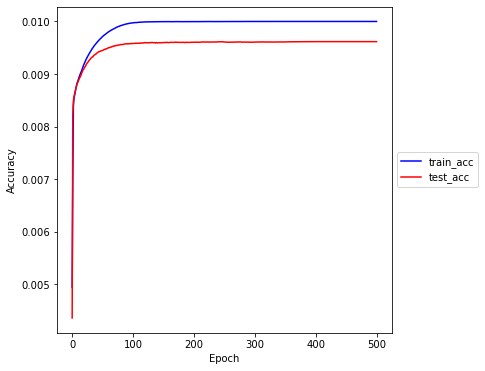

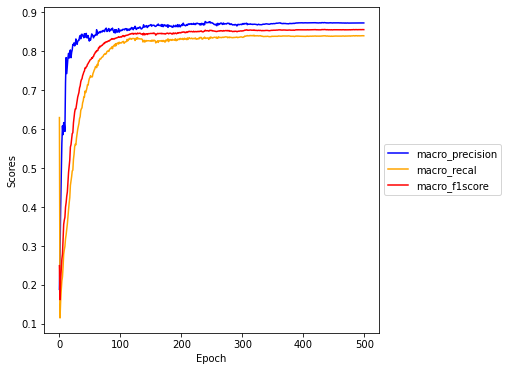


       EC1    EC2    EC3    EC4    EC5    EC6
Acc  0.963  0.931  0.934  0.976  0.984  0.980
Pre  0.902  0.891  0.913  0.874  0.861  0.795
Rec  0.888  0.893  0.910  0.840  0.774  0.734
F1s  0.895  0.892  0.911  0.857  0.815  0.763


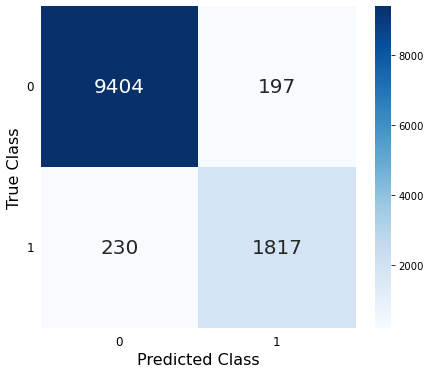

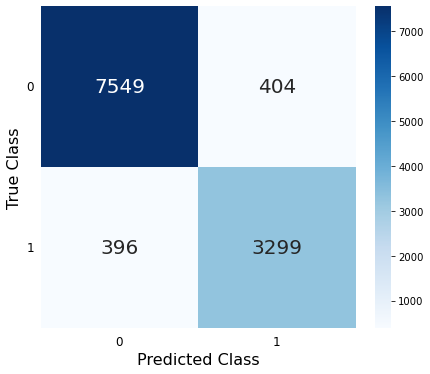

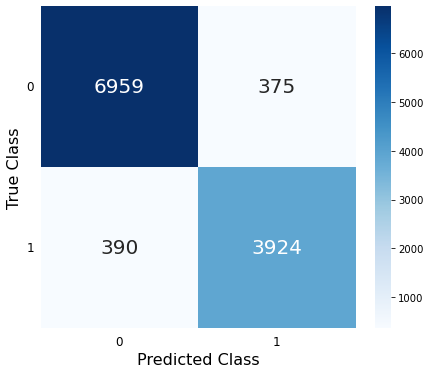

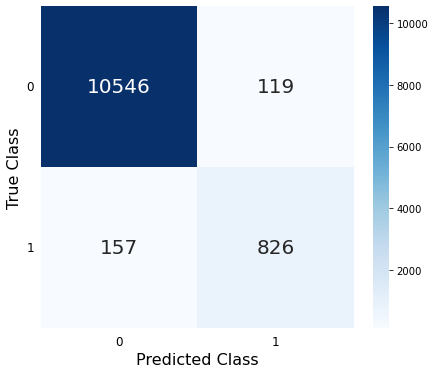

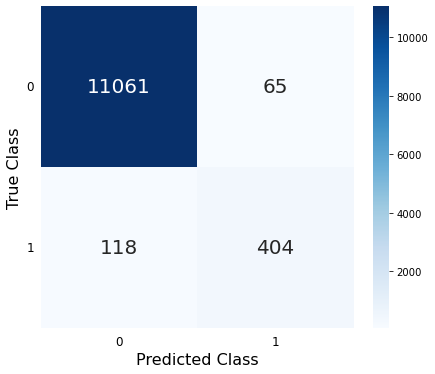

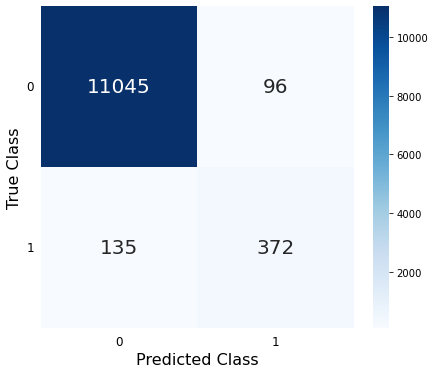


[Total]
- total_accuracy : 0.9616
- macro_precision : 0.8727
- macro_recall : 0.8397
- macro_f1score : 0.8555

       EC1    EC2    EC3    EC4    EC5    EC6
Acc  0.963  0.931  0.934  0.976  0.984  0.980
Pre  0.902  0.891  0.913  0.874  0.861  0.795
Rec  0.888  0.893  0.910  0.840  0.774  0.734
F1s  0.895  0.892  0.911  0.857  0.815  0.763
- accuracy : 0.9616
- macro_precision : 0.8727
- macro_recall : 0.8397
- macro_f1 : 0.8555


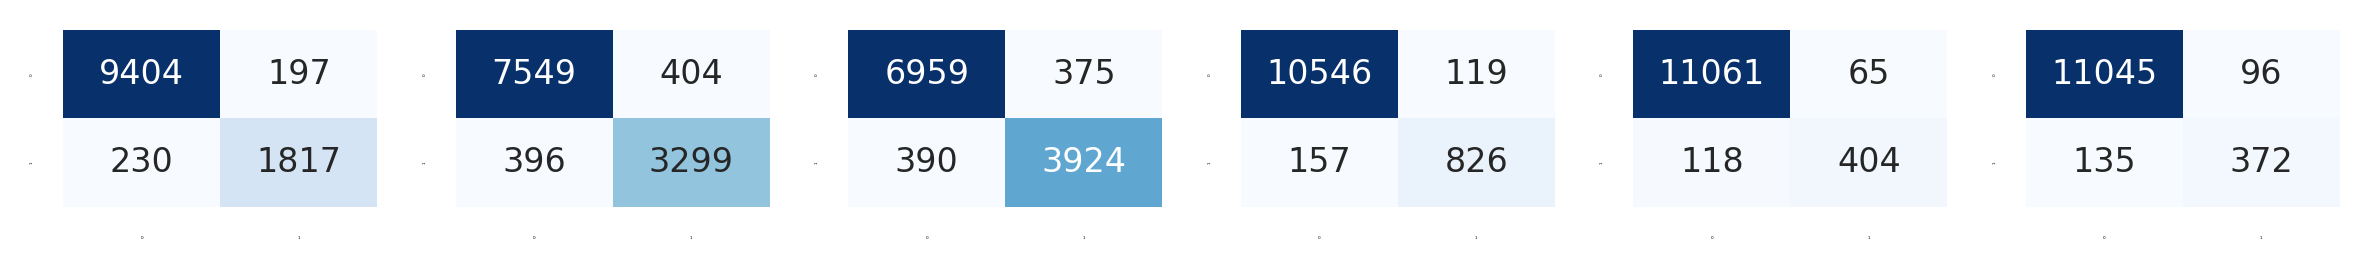

([0.9633413461538461,
  0.9313186813186813,
  0.934323489010989,
  0.976304945054945,
  0.9842891483516484,
  0.9801682692307693],
 [0.9021847070506455,
  0.8908992708614637,
  0.9127704117236567,
  0.8740740740740741,
  0.8614072494669509,
  0.7948717948717948],
 [0.8876404494382022,
  0.8928281461434371,
  0.9095966620305981,
  0.8402848423194303,
  0.7739463601532567,
  0.7337278106508875],
 [0.8948534843634572,
  0.8918626655852935,
  0.9111807732497388,
  0.8568464730290457,
  0.8153380423814329,
  0.763076923076923],
 0.9616243131868133,
 0.872701251341431,
 0.8396707117893021,
 0.8555263936143152)

In [77]:
file = './EC500'
result_df = pd.read_json(f'./{file}_results.json', orient='table')
pro_total = np.load(f'{file}_true.npy')
pred_pro_total = np.load(f'{file}_pred.npy')

make_plots(result_df, pro_total, pred_pro_total)
metrics(pro_total, pred_pro_total, test=True)